In [9]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\bever\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [10]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [12]:
%matplotlib inline

In [13]:
import os
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

# Select your features (columns)

In [48]:
df = pd.read_csv(os.path.join("data", "mushrooms.csv"))
# #" Drop the null columns where all values are null
# df = df.dropna(axis='columns', how='all')
# # Drop the null rows
# df = df.dropna()
# df.head()

In [49]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [50]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# Target Data
class:edible=e, poisonous=p

# Mushroom Diagram
![Mushroom Diagram](images/structure-mushroom.jpg)


Cap: The cap is the top of the mushroom (and often looks sort of like a small umbrella). Mushroom caps can come in a variety of colors but most often are brown, white, or yellow.

Gills, Pores, or Teeth: These structures appear under the mushroom's cap. They look similar to a fish's gills.

Ring: The ring (sometimes called the annulus) is the remaining structure of the partial veil after the gills have pushed through.

Stem or Stipe: The stem is the tall structure that holds the cap high above the ground.

Volva: The volva is the protective veil that remains after the mushroom sprouted up from the ground. As the fungus grows, it breaks through the volva.

Spores: Microscopic seeds acting as reproductive agents; they are usually released into the air and fall on a substrate to produce a new mushroom.

(resource:http://www.visualdictionaryonline.com/plants-gardening/plants/mushroom/structure-mushroom.php)

In [51]:
# class:edible=e, poisonous=p
df['class'] = df['class'].replace(['e','p'],['edible','poisonous'])
df['class']

0       poisonous
1          edible
2          edible
3       poisonous
4          edible
          ...    
8119       edible
8120       edible
8121       edible
8122    poisonous
8123       edible
Name: class, Length: 8124, dtype: object

In [52]:
# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
df['cap-shape'] = df['cap-shape'].replace(['b','c','x','f','k','s'],['bell','conical','convex','flat', 'knobbed', 'sunken' ])
df['cap-shape']

0        convex
1        convex
2          bell
3        convex
4        convex
         ...   
8119    knobbed
8120     convex
8121       flat
8122    knobbed
8123     convex
Name: cap-shape, Length: 8124, dtype: object

# Mushroom cap shape
![Mushroom cap shape](images/mushroom-cap-shapes.jpg)


(resource:https://midwestmycology.org/mushroom-cap-shapes/)

In [53]:
# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
df['cap-surface'] = df['cap-surface'].replace(['f','g','y','s'],['fibrous','grooves','scaly','smooth'])
df['cap-surface']

0       smooth
1       smooth
2       smooth
3        scaly
4       smooth
         ...  
8119    smooth
8120    smooth
8121    smooth
8122     scaly
8123    smooth
Name: cap-surface, Length: 8124, dtype: object


# Mushroom cap surface
![Mushroom cap surface](images/mushroom-cap-surface.jpg)


(resource:https://datascienceplus.com/mushrooms-classification-part-1/)


In [54]:
# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
df['cap-color'] = df['cap-color'].replace(['n','b','c','g','r','p','u','e','w','y'],['brown','buff','cinnamon','gray','green', 'pink','purple','red','white','yellow'])
df['cap-color']

0        brown
1       yellow
2        white
3        white
4         gray
         ...  
8119     brown
8120     brown
8121     brown
8122     brown
8123     brown
Name: cap-color, Length: 8124, dtype: object

In [55]:
# bruises: bruises=t,no=f
df['bruises'] = df['bruises'].replace(['t','f'],['bruises','no'])
df['bruises']

0       bruises
1       bruises
2       bruises
3       bruises
4            no
         ...   
8119         no
8120         no
8121         no
8122         no
8123         no
Name: bruises, Length: 8124, dtype: object

In [56]:
# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
df['odor'] = df['odor'].replace(['a','l','c','y','f','m','n','p','s'],['almond','anise','creosote','fishy','foul','musty','none','pungent','spicy'])
df['odor']

0       pungent
1        almond
2         anise
3       pungent
4          none
         ...   
8119       none
8120       none
8121       none
8122      fishy
8123       none
Name: odor, Length: 8124, dtype: object

In [57]:
# gill-attachment: attached=a,descending=d,free=f,notched=n
df['gill-attachment'] = df['gill-attachment'].replace(['a','d','f','n'],['attached','descending','free','notched'])
df['gill-attachment']

0           free
1           free
2           free
3           free
4           free
          ...   
8119    attached
8120    attached
8121    attached
8122        free
8123    attached
Name: gill-attachment, Length: 8124, dtype: object

In [58]:
# gill-spacing: close=c,crowded=w,distant=d
df['gill-spacing'] = df['gill-spacing'].replace(['c','w','d'],['close','crowded','distant'])
df['gill-spacing']

0         close
1         close
2         close
3         close
4       crowded
         ...   
8119      close
8120      close
8121      close
8122      close
8123      close
Name: gill-spacing, Length: 8124, dtype: object

In [59]:
# gill-size: broad=b,narrow=n
df['gill-size'] = df['gill-size'].replace(['b','n'],['broad','narrow'])
df['gill-size']

0       narrow
1        broad
2        broad
3       narrow
4        broad
         ...  
8119     broad
8120     broad
8121     broad
8122    narrow
8123     broad
Name: gill-size, Length: 8124, dtype: object

In [60]:
# gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
df['gill-color'] = df['gill-color'].replace(['k','n','b','h','g','r','o','p','u','e','w','y'],['black','brown','buff','chocolate','gray', 'green','orange','pink','purple','red', 'white','yellow'])
df['gill-color']

0        black
1        black
2        brown
3        brown
4        black
         ...  
8119    yellow
8120    yellow
8121     brown
8122      buff
8123    yellow
Name: gill-color, Length: 8124, dtype: object

In [61]:
# stalk-shape: enlarging=e,tapering=t
df['stalk-shape'] = df['stalk-shape'].replace(['e','t'],['enlarging','tapering'])
df['stalk-shape']

0       enlarging
1       enlarging
2       enlarging
3       enlarging
4        tapering
          ...    
8119    enlarging
8120    enlarging
8121    enlarging
8122     tapering
8123    enlarging
Name: stalk-shape, Length: 8124, dtype: object

In [62]:
# stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?

In [ ]:
# stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

In [ ]:
# stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

In [ ]:
# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

In [ ]:
# stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

In [ ]:
# veil-type: partial=p,universal=u

In [ ]:
# veil-color: brown=n,orange=o,white=w,yellow=y

In [ ]:
# ring-number: none=n,one=o,two=t

In [ ]:
# ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z

In [ ]:
# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y

In [ ]:
# population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y

In [ ]:
# habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [20]:
# Set features. This will also be used as your x values.
# selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_period', 'koi_period_err1', 
#                         'koi_period_err2', 'koi_time0bk','koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 
#                         'koi_impact_err1','koi_impact_err2', 'koi_duration', 'koi_duration_err1','koi_duration_err2', 
#                         'koi_depth', 'koi_depth_err1', 'koi_depth_err2','koi_prad', 'koi_prad_err1', 'koi_prad_err2']]

# Let's see what happens using all features
selected_features = df.drop("class", axis=1)
selected_features_names = selected_features.columns
selected_features.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [21]:
selected_features_names

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Create a Train Test Split

Use `class` for the y (target) values

In [22]:
target = df["class"]
target_names = ["edible", "poisonous"]
data = selected_features
data_names = selected_features_names

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [24]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3887,x,s,w,f,c,f,c,n,n,e,...,s,w,w,p,w,o,p,n,s,d
4119,f,f,y,f,f,f,c,b,h,e,...,k,n,b,p,w,o,l,h,v,g
1600,x,y,g,t,n,f,c,b,n,t,...,s,p,g,p,w,o,p,k,y,d
4988,x,y,y,f,f,f,c,b,p,e,...,k,n,n,p,w,o,l,h,y,p
6757,f,y,n,f,f,f,c,n,b,t,...,k,w,p,p,w,o,e,w,v,d


In [25]:
X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1971,f,f,n,f,n,f,w,b,h,t,...,f,w,w,p,w,o,e,n,s,g
6654,f,s,e,f,y,f,c,n,b,t,...,s,p,p,p,w,o,e,w,v,l
5606,x,y,n,f,f,f,c,n,b,t,...,s,w,p,p,w,o,e,w,v,l
3332,f,y,g,t,n,f,c,b,n,t,...,s,g,p,p,w,o,p,n,y,d
6988,f,s,e,f,s,f,c,n,b,t,...,s,p,p,p,w,o,e,w,v,l


In [26]:
y_train.head()

3887    p
4119    p
1600    e
4988    p
6757    p
Name: class, dtype: object

In [27]:
y_test.head()

1971    e
6654    p
5606    p
3332    e
6988    p
Name: class, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [28]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

ValueError: could not convert string to float: 'x'

# Train the Model



In [13]:
rf = RandomForestClassifier()
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.8901601830663616

In [14]:
# Output the training and testing score for the model
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8901601830663616


In [15]:
rf

RandomForestClassifier()

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [16]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust

param_grid = {'n_estimators': [50, 100, 150, 200, 250],
              'max_depth': [10, 20, 30, 40],
             'max_features': ['auto', 'sqrt','log2']}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [17]:
# Train the model with GridSearch
grid_result = grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] max_depth=10, max_features=auto, n_estimators=50 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=auto, n_estimators=50, score=0.898, total=   0.7s
[CV] max_depth=10, max_features=auto, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=10, max_features=auto, n_estimators=50, score=0.900, total=   0.6s
[CV] max_depth=10, max_features=auto, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=10, max_features=auto, n_estimators=50, score=0.897, total=   0.7s
[CV] max_depth=10, max_features=auto, n_estimators=50 ................
[CV]  max_depth=10, max_features=auto, n_estimators=50, score=0.870, total=   0.6s
[CV] max_depth=10, max_features=auto, n_estimators=50 ................
[CV]  max_depth=10, max_features=auto, n_estimators=50, score=0.884, total=   0.6s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.893, total=   1.2s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.890, total=   1.4s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.896, total=   1.3s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.875, tot

[CV]  max_depth=10, max_features=log2, n_estimators=100, score=0.894, total=   1.2s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, score=0.898, total=   1.2s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, score=0.896, total=   1.2s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, score=0.873, total=   1.3s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, score=0.888, total=   1.2s
[CV] max_depth=10, max_features=log2, n_estimators=150 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=150, score=0.894, total=   1.9s
[CV] max_depth=10, max_features=log2, n_estimators=150 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=150, score=0.897, 

[CV]  max_depth=20, max_features=sqrt, n_estimators=100, score=0.886, total=   1.5s
[CV] max_depth=20, max_features=sqrt, n_estimators=100 ...............
[CV]  max_depth=20, max_features=sqrt, n_estimators=100, score=0.883, total=   2.0s
[CV] max_depth=20, max_features=sqrt, n_estimators=150 ...............
[CV]  max_depth=20, max_features=sqrt, n_estimators=150, score=0.909, total=   2.9s
[CV] max_depth=20, max_features=sqrt, n_estimators=150 ...............
[CV]  max_depth=20, max_features=sqrt, n_estimators=150, score=0.900, total=   2.8s
[CV] max_depth=20, max_features=sqrt, n_estimators=150 ...............
[CV]  max_depth=20, max_features=sqrt, n_estimators=150, score=0.892, total=   2.7s
[CV] max_depth=20, max_features=sqrt, n_estimators=150 ...............
[CV]  max_depth=20, max_features=sqrt, n_estimators=150, score=0.885, total=   2.7s
[CV] max_depth=20, max_features=sqrt, n_estimators=150 ...............
[CV]  max_depth=20, max_features=sqrt, n_estimators=150, score=0.881, 

[CV]  max_depth=30, max_features=auto, n_estimators=150, score=0.894, total=   2.2s
[CV] max_depth=30, max_features=auto, n_estimators=150 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=150, score=0.892, total=   2.3s
[CV] max_depth=30, max_features=auto, n_estimators=150 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=150, score=0.887, total=   2.2s
[CV] max_depth=30, max_features=auto, n_estimators=150 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=150, score=0.882, total=   2.3s
[CV] max_depth=30, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=200, score=0.905, total=   3.0s
[CV] max_depth=30, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=200, score=0.895, total=   3.0s
[CV] max_depth=30, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=200, score=0.888, 

[CV]  max_depth=30, max_features=log2, n_estimators=150, score=0.882, total=   2.5s
[CV] max_depth=30, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=30, max_features=log2, n_estimators=200, score=0.906, total=   3.8s
[CV] max_depth=30, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=30, max_features=log2, n_estimators=200, score=0.897, total=   3.2s
[CV] max_depth=30, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=30, max_features=log2, n_estimators=200, score=0.891, total=   3.3s
[CV] max_depth=30, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=30, max_features=log2, n_estimators=200, score=0.884, total=   3.1s
[CV] max_depth=30, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=30, max_features=log2, n_estimators=200, score=0.877, total=   3.3s
[CV] max_depth=30, max_features=log2, n_estimators=250 ...............
[CV]  max_depth=30, max_features=log2, n_estimators=250, score=0.907, 

[CV]  max_depth=40, max_features=sqrt, n_estimators=200, score=0.886, total=   3.4s
[CV] max_depth=40, max_features=sqrt, n_estimators=200 ...............
[CV]  max_depth=40, max_features=sqrt, n_estimators=200, score=0.887, total=   3.2s
[CV] max_depth=40, max_features=sqrt, n_estimators=200 ...............
[CV]  max_depth=40, max_features=sqrt, n_estimators=200, score=0.884, total=   3.2s
[CV] max_depth=40, max_features=sqrt, n_estimators=250 ...............
[CV]  max_depth=40, max_features=sqrt, n_estimators=250, score=0.908, total=   4.1s
[CV] max_depth=40, max_features=sqrt, n_estimators=250 ...............
[CV]  max_depth=40, max_features=sqrt, n_estimators=250, score=0.896, total=   3.9s
[CV] max_depth=40, max_features=sqrt, n_estimators=250 ...............
[CV]  max_depth=40, max_features=sqrt, n_estimators=250, score=0.891, total=   4.0s
[CV] max_depth=40, max_features=sqrt, n_estimators=250 ...............
[CV]  max_depth=40, max_features=sqrt, n_estimators=250, score=0.887, 

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 11.3min finished


In [18]:
# Output the grid search best params and best score
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 50}
0.8950956563502863


In [19]:
# Output the grid training and test scores
print(f"Training Data Score: {grid.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {grid.score(X_test_scaled, y_test)}")

Training Data Score: 0.9969483120350944
Testing Data Score: 0.8947368421052632


In [20]:
# Found in article https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998
best_params = grid_result.best_params_
best_rf = RandomForestClassifier(max_depth=best_params["max_depth"], max_features=best_params["max_features"], n_estimators=best_params["n_estimators"])
best_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=50)

In [21]:
# Output the training and test scores for the best params model
print(f"Best Random Forest Training Data Score: {best_rf.score(X_train_scaled, y_train)}")
print(f"Best Random Forest Testing Data Score: {best_rf.score(X_test_scaled, y_test)}")

Best Random Forest Training Data Score: 0.9954224680526416
Best Random Forest Testing Data Score: 0.8953089244851259


In [22]:
# Make predictions and calculate classification report
predictions = best_rf.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

      CANIDATE       0.81      0.76      0.79       411
     CONFIRMED       0.82      0.83      0.83       484
FALSE POSITIVE       0.98      0.99      0.98       853

      accuracy                           0.90      1748
     macro avg       0.87      0.86      0.87      1748
  weighted avg       0.89      0.90      0.89      1748



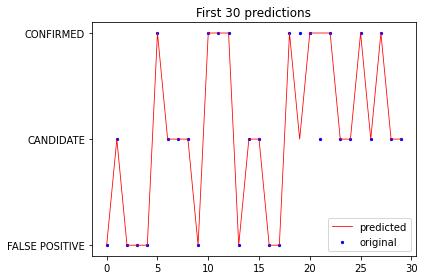

In [23]:
# Create a preduction vs original chart
x_ax = range(len(y_test[:30]))
plt.scatter(x_ax, y_test[:30], s=5, color="blue", label="original")
plt.plot(x_ax, predictions[:30], lw=0.8, color="red", label="predicted")
plt.title('First 30 predictions')
plt.legend()
# Save the plot
plt.tight_layout()
plt.savefig(os.path.join("..", "Images", "random_forest_plot.png"))
# Show the figure
plt.show()

# Save the Model

In [24]:
# Save the model
filename = os.path.join("..", "models", "model_random_forest.sav")
joblib.dump(best_rf, filename)

['..\\models\\model_random_forest.sav']

# Save the Grid

In [25]:
# Save the grid
filename = os.path.join("..", "models", "grid_random_forest.sav")
joblib.dump(grid, filename)

['..\\models\\grid_random_forest.sav']